In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("C:\\Users\\smartech\\OneDrive\\Desktop\\pcos_prediction_dataset.csv")

In [5]:
df

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,Guinea,28,Normal,Regular,No,Moderate,Yes,No,3,Low,Urban,Middle,Yes,Yes,0.090663,African,No
119996,Mozambique,35,Overweight,Regular,No,NaN,No,No,5,Low,Rural,High,Yes,Yes,0.167482,Asian,No
119997,Cambodia,16,Normal,Regular,No,Moderate,No,No,9,Medium,Rural,Low,Yes,Yes,0.236241,African,Yes
119998,Benin,15,Obese,Regular,Yes,NaN,Yes,Yes,1,Medium,Rural,High,No,No,0.119993,Hispanic,No


In [7]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [9]:
print(df.describe())

                 Age  Lifestyle Score  Undiagnosed PCOS Likelihood
count  120000.000000    120000.000000                120000.000000
mean       31.980508         5.506567                     0.149937
std        10.096799         2.871052                     0.057786
min        15.000000         1.000000                     0.050001
25%        23.000000         3.000000                     0.099820
50%        32.000000         6.000000                     0.149844
75%        41.000000         8.000000                     0.200061
max        49.000000        10.000000                     0.249998


In [11]:
df.drop('Country',axis=1)

,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,28,Normal,Regular,No,Moderate,Yes,No,3,Low,Urban,Middle,Yes,Yes,0.090663,African,No
119996,35,Overweight,Regular,No,NaN,No,No,5,Low,Rural,High,Yes,Yes,0.167482,Asian,No
119997,16,Normal,Regular,No,Moderate,No,No,9,Medium,Rural,Low,Yes,Yes,0.236241,African,Yes
119998,15,Obese,Regular,Yes,NaN,Yes,Yes,1,Medium,Rural,High,No,No,0.119993,Hispanic,No


In [13]:
df = df.dropna()

In [15]:
print(df.isnull().sum())

Country                        0
Age                            0
BMI                            0
Menstrual Regularity           0
Hirsutism                      0
Acne Severity                  0
Family History of PCOS         0
Insulin Resistance             0
Lifestyle Score                0
Stress Levels                  0
Urban/Rural                    0
Socioeconomic Status           0
Awareness of PCOS              0
Fertility Concerns             0
Undiagnosed PCOS Likelihood    0
Ethnicity                      0
Diagnosis                      0
dtype: int64


In [17]:
print(df.duplicated().sum())

0


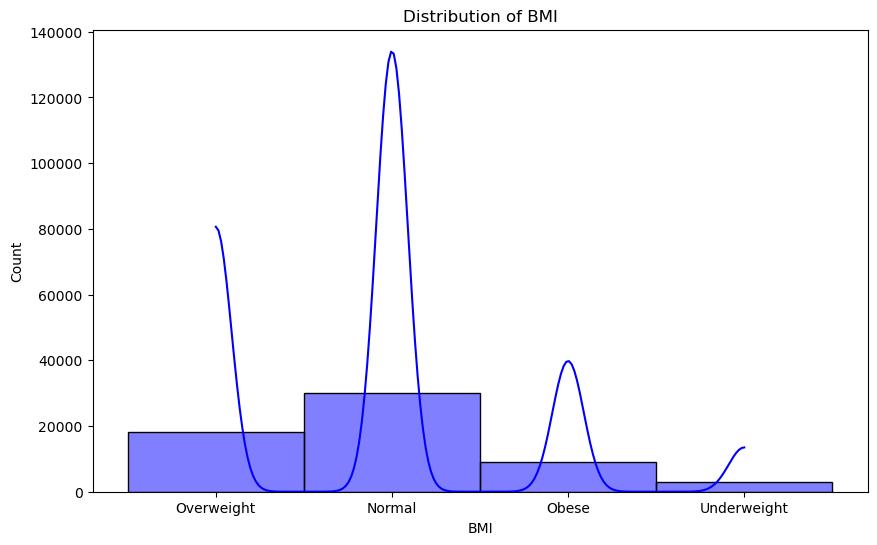

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True, color='blue')
plt.title('Distribution of BMI')
plt.show()

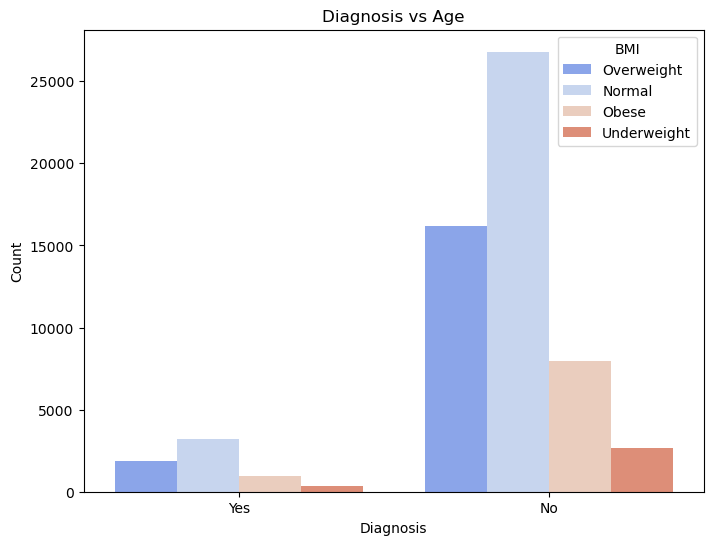

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diagnosis', hue='BMI', palette='coolwarm')
plt.title('Diagnosis vs Age')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='BMI', loc='upper right')
plt.show()

In [23]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [25]:
numerical_columns

Index(['Age', 'Lifestyle Score', 'Undiagnosed PCOS Likelihood'], dtype='object')

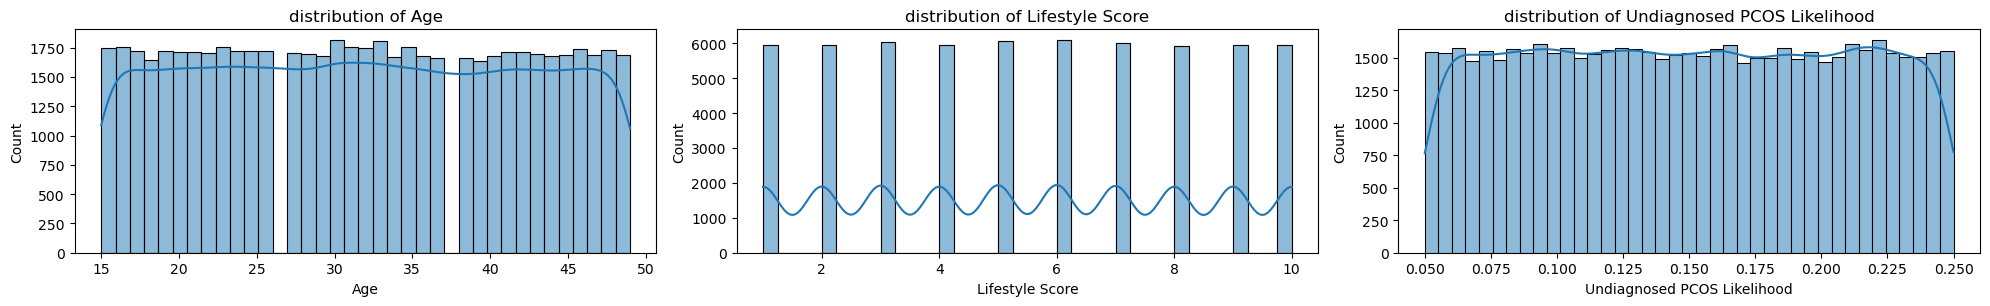

In [27]:
plt.figure(figsize=(20,14))
for i,col in enumerate(numerical_columns,1):
    plt.subplot(5,3,i)
    sns.histplot(df[col],kde=True)
    plt.title(f"distribution of {col}")
plt.tight_layout()
plt.show()

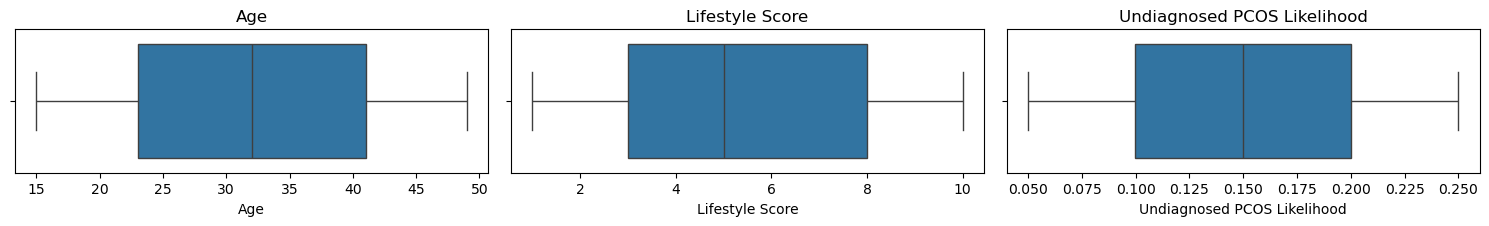

In [29]:
plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_columns,1):
    plt.subplot(5,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

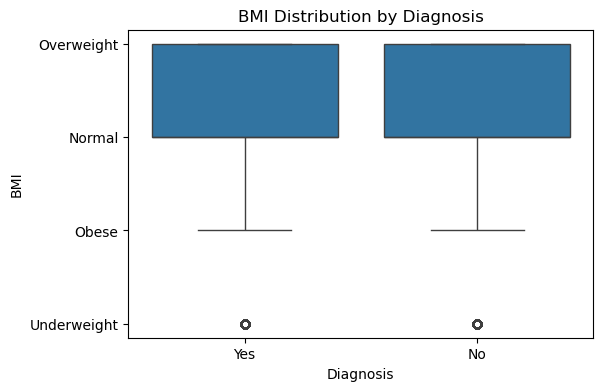

In [31]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Diagnosis', y='BMI', data=df)
plt.title('BMI Distribution by Diagnosis')
plt.show()

In [33]:
binary_cols = ['Diagnosis', 'Family History of PCOS', 'Hirsutism']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

C:\Users\smartech\AppData\Local\Temp\ipykernel_10496\1308656105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


In [35]:
df = pd.get_dummies(df, columns=['BMI', 'Menstrual Regularity', 'Acne Severity','Insulin Resistance','Stress Levels','Urban/Rural','Socioeconomic Status','Awareness of PCOS','Fertility Concerns','Ethnicity'], drop_first=True)

In [53]:
df.drop(columns=['Country'],inplace=True,axis=1)

In [55]:
for col in df.columns:
    if df[col].dtype == 'object':  
        print(f"Column '{col}' has non-numeric values.")

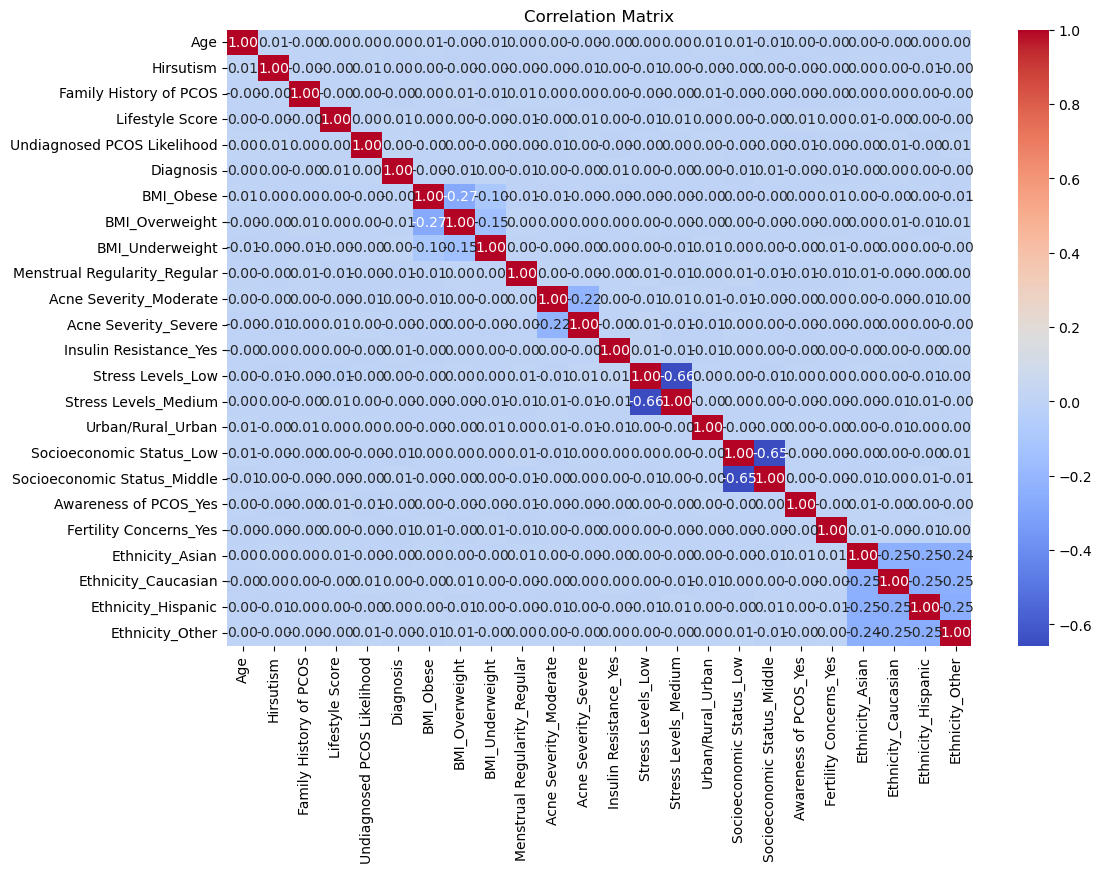

In [59]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [61]:
df.to_csv("cleaned_pcos_dataset.csv", index=False)